In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import itertools

In [93]:
df = pd.read_csv('Music Sales.csv', index_col=None)

In [94]:
df.head()

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,MediaType,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice
0,Balls to the Wall,Accept,5.51M,3.96,Stuttgart,NaN,NaN,Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,342562,1,+49 0711 2842222,70174,4,Europe,NaN,Balls to the Wall,0.99
1,Restless and Wild,Accept,4.33M,3.96,Stuttgart,NaN,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,252051,1,+49 0711 2842222,70174,4,Europe,NaN,Restless and Wild,0.99
2,For Those About To Rock We Salute You,AC/DC,8.60M,0.99,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,263288,1,+47 22 44 22 22,171,1,Europe,NaN,Breaking The Rules,0.99
3,For Those About To Rock We Salute You,AC/DC,6.85M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,210834,1,+47 22 44 22 22,171,2,Europe,NaN,Inject The Venom,0.99
4,For Those About To Rock We Salute You,AC/DC,8.61M,1.98,Oslo,NaN,"Angus Young, Malcolm Young, Brian Johnson",Norway,4,bjorn.hansen@yahoo.no,...,MPEG audio file,263497,1,+47 22 44 22 22,171,2,Europe,NaN,Evil Walks,0.99


**Sales Distribution By Region**

In [95]:
# the purpose of the Graph is to access which regions in Asia and Europe sell the most records, 
# so we filter the region in Europe and Asia
df_EA = df[df['Region'].isin(['Europe', 'Asia'])].copy()
df_EA_subset = df_EA[['Region','Country','Sales']]
df_EA_subset.head()
#df_EA_subset[df_EA_subset['Region']=='Asia'].Country.value_counts()

,Region,Country,Sales
0,Europe,Germany,3.96
1,Europe,Germany,3.96
2,Europe,Norway,0.99
3,Europe,Norway,1.98
4,Europe,Norway,1.98


In [96]:
# calculate the sum of the sales for each country in Asia and Europe and sort the sales by the decending order
sale_country = df_EA_subset.groupby(['Country'])['Sales'].sum().sort_values(ascending = False)
sale_country.index
sale_country_lst = list(sale_country.index)
sale_country_lst

['France',
 'Germany',
 'United Kingdom',
 'Czech Republic',
 'India',
 'Portugal',
 'Hungary',
 'Finland',
 'Netherlands',
 'Ireland',
 'Austria',
 'Poland',
 'Denmark',
 'Sweden',
 'Italy',
 'Norway',
 'Spain',
 'Belgium']

In [97]:
R_sale = list(sale_country.values) 
R_sale

[562.5000000000006,
 421.88000000000034,
 301.95,
 269.7199999999999,
 210.91000000000005,
 197.04999999999995,
 168.60999999999999,
 136.76999999999995,
 132.77999999999997,
 125.92999999999998,
 123.88999999999999,
 121.77,
 112.85999999999999,
 109.92999999999999,
 107.91000000000003,
 105.95999999999998,
 102.96000000000001,
 101.97000000000001]

In [98]:
# the total of the sales in the Europe and Asia
sale_sum = df_EA_subset['Sales'].sum()
sale_sum

3415.35

In [99]:
# calculate the percentage of sales for each country
sale_percentage = []
for x in R_sale:
    sale_percentage.append((x/sale_sum)*100)
sale_percentage_str = [ "{0:.2f}%".format(x) for x in sale_percentage ]
sale_percentage_str

['16.47%',
 '12.35%',
 '8.84%',
 '7.90%',
 '6.18%',
 '5.77%',
 '4.94%',
 '4.00%',
 '3.89%',
 '3.69%',
 '3.63%',
 '3.57%',
 '3.30%',
 '3.22%',
 '3.16%',
 '3.10%',
 '3.01%',
 '2.99%']

In [100]:
# create a new dataframe for plot
sale_by_region = pd.DataFrame()
sale_by_region['region'] =['Europe','Europe','Europe','Europe','Asia','Europe','Europe','Europe','Europe','Europe',\
                          'Europe','Europe','Europe','Europe','Europe','Europe','Europe','Europe']
sale_by_region['country'] = sale_country_lst
sale_by_region['sale_percent'] = sale_percentage_str
# sale_percent_numeric will decide the size of the rectangles
sale_by_region['sale_percent_numeric'] = sale_percentage 
sale_by_region

,region,country,sale_percent,sale_percent_numeric
0,Europe,France,16.47%,16.469762
1,Europe,Germany,12.35%,12.352468
2,Europe,United Kingdom,8.84%,8.840968
3,Europe,Czech Republic,7.90%,7.897287
4,Asia,India,6.18%,6.175355
5,Europe,Portugal,5.77%,5.769540
6,Europe,Hungary,4.94%,4.936829
7,Europe,Finland,4.00%,4.004568
8,Europe,Netherlands,3.89%,3.887742
9,Europe,Ireland,3.69%,3.687177


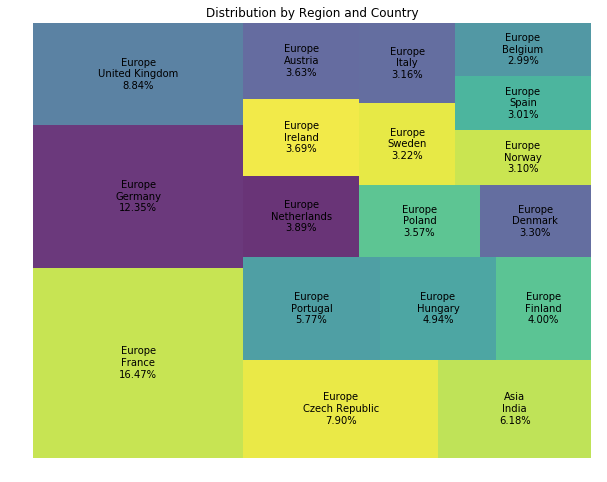

In [101]:
# draw the plot
fig = plt.figure(figsize=(10,8))
ax = plt.gca()
import squarify
sale_by_region['region_country'] = sale_by_region['region']+'\n'+sale_by_region['country']+\
                                   '\n'+sale_by_region['sale_percent']
squarify.plot(sizes=sale_by_region['sale_percent_numeric'], label=sale_by_region['region_country'], alpha=.8)
plt.title('Distribution by Region and Country')
plt.axis('off')
plt.show()

**The comparsion of the genres among countries in Europe**

The purpose of this graph is to show the sales of genres in different countries of the Europe. From the graph, we can  compare the most popular and not so popular genres among the different countries.

In [102]:
df_E = df[df['Region'].isin(['Europe'])].copy() # filter out the data in Europe
df_E_subset = df_E[['Country','Genre','Sales']]
df_E_subset.head()

,Country,Genre,Sales
0,Germany,Rock,3.96
1,Germany,Rock,3.96
2,Norway,Rock,0.99
3,Norway,Rock,1.98
4,Norway,Rock,1.98


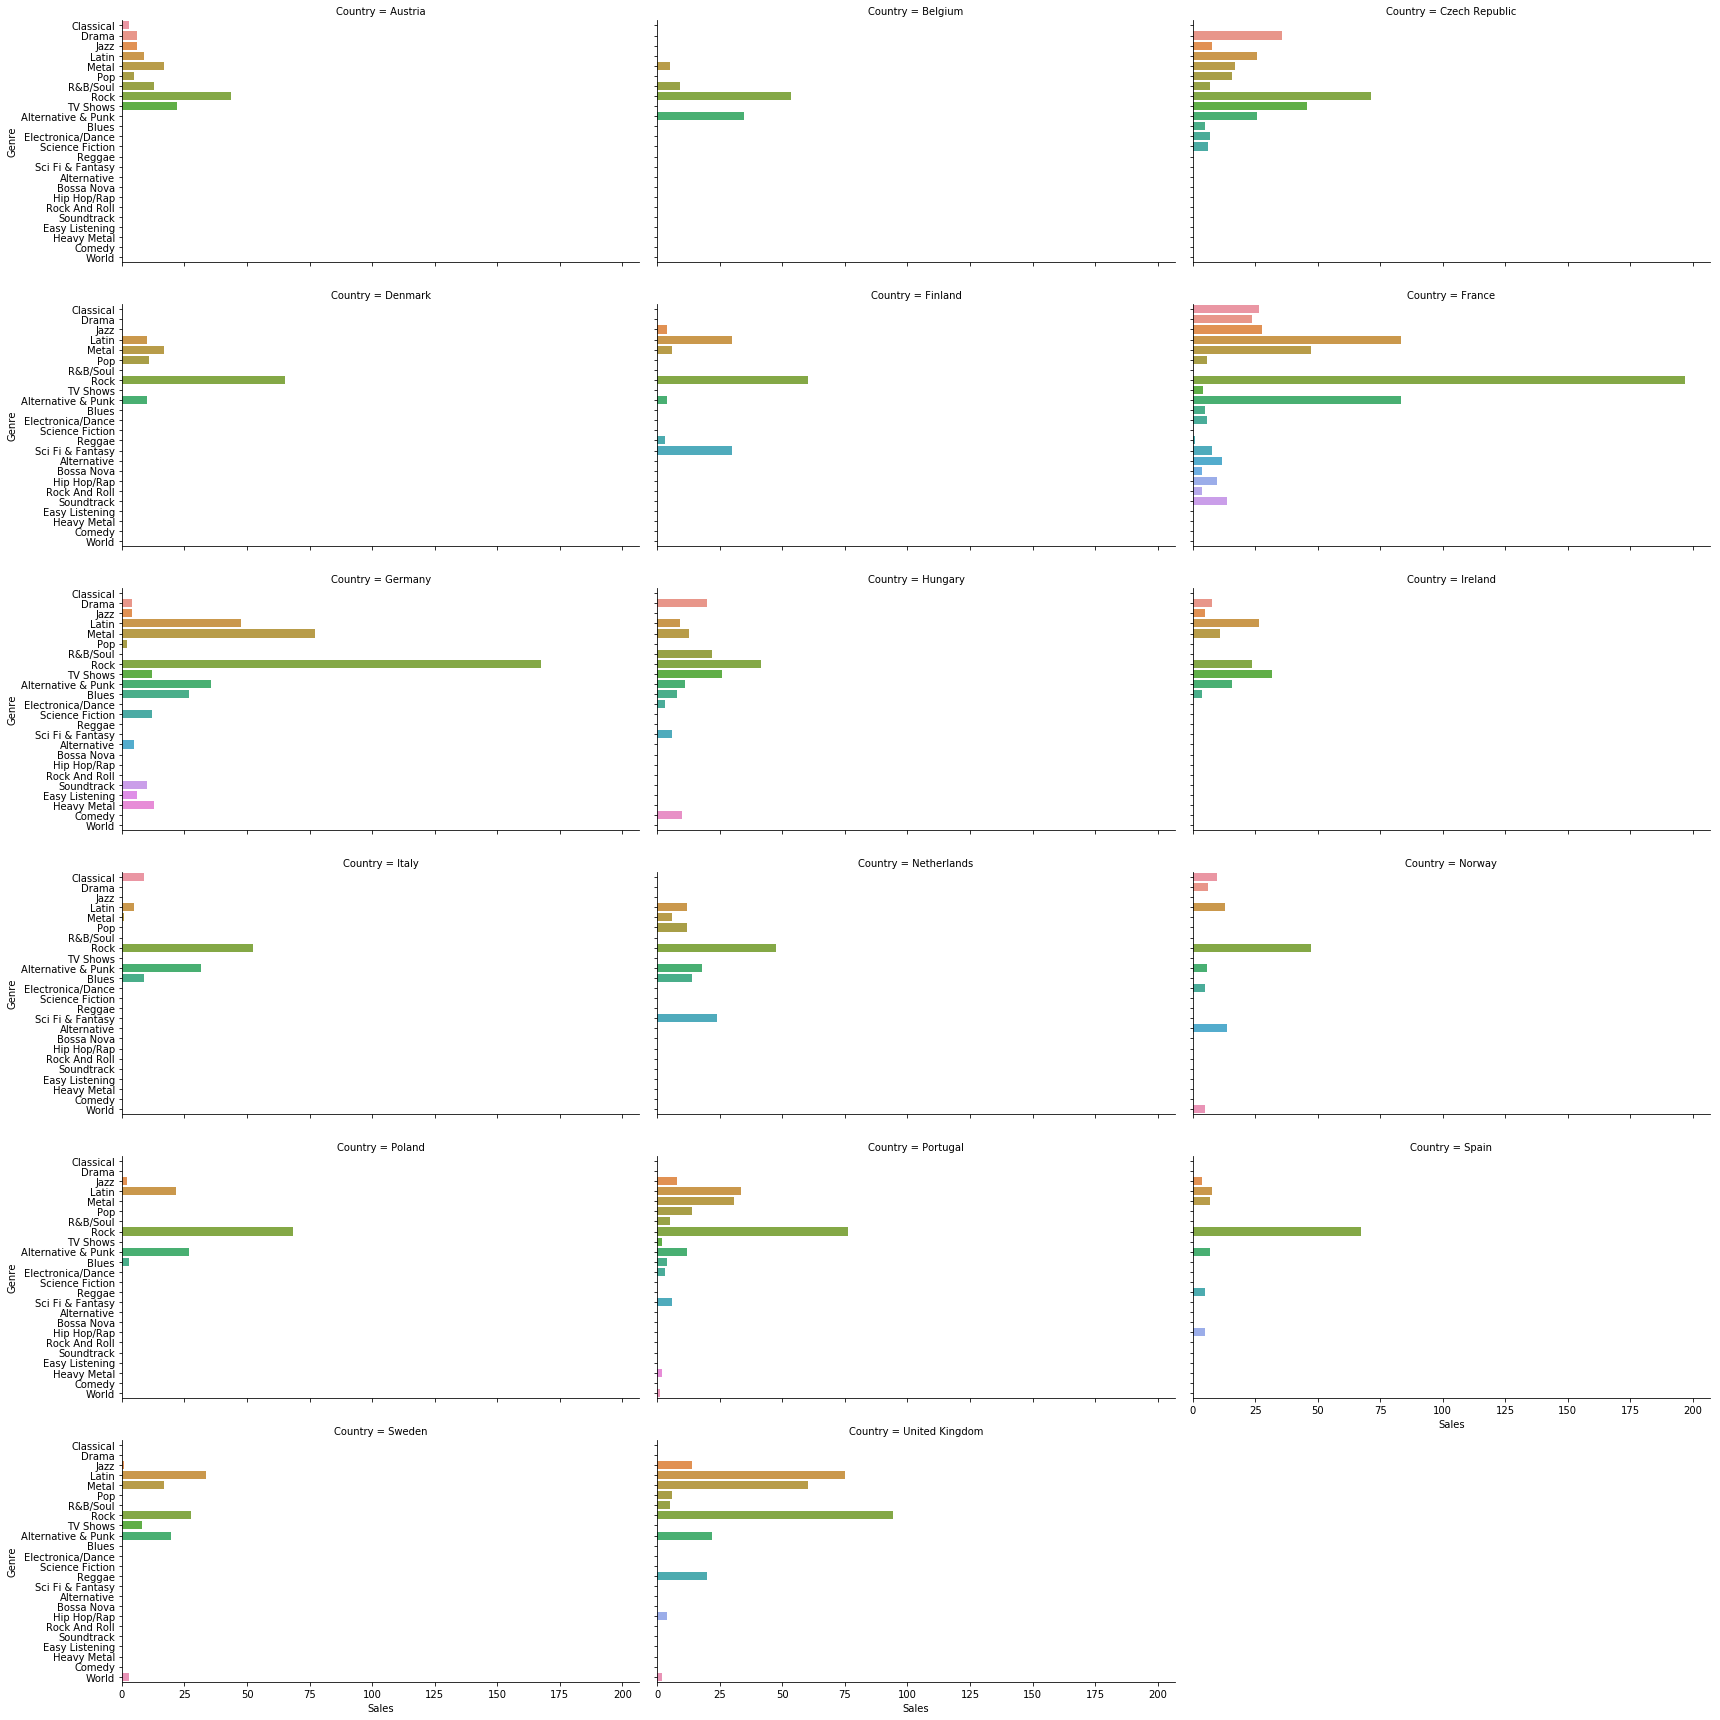

In [109]:
# group the data by country and genre, then sum the sales
sale_genre = df_E_subset.groupby(['Country', 'Genre']).sum()
# creat a new dataframe
sale_genre_df = pd.DataFrame() 

sale_genre_df['Country'] = [ x[0] for x in sale_genre.index ]
sale_genre_df['Genre'] = [ x[1] for x in sale_genre.index ]
sale_genre_df['Sales'] = sale_genre.values
sale_genre_df

import seaborn as sns

sale_genre_country = sns.catplot(x="Sales", y="Genre", col="Country", data=sale_genre_df, orient="h", col_wrap=3, kind = 'bar', height=4, aspect=2.)